In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
from scipy.stats import gaussian_kde
import math

In [2]:
dp= pd.read_csv(r'C:\Users\sony\OneDrive\Desktop\databases\Stack overflow\survey_results_public.csv')


In [69]:
dp.dtypes

ResponseId               int64
Q120                    object
MainBranch              object
Age                     object
Employment              string
                        ...   
ProfessionalTech        object
Industry                object
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
Length: 84, dtype: object

In [49]:
# check for missing values
for col in dp.columns:
    per_missing=np.mean(dp[col].isnull())
    print('{}-{}%'.format(col,round(per_missing*100)))

ResponseId-0%
Q120-0%
MainBranch-0%
Age-0%
Employment-1%
RemoteWork-17%
CodingActivities-17%
EdLevel-1%
LearnCode-2%
LearnCodeOnline-21%
LearnCodeCoursesCert-58%
YearsCode-2%
YearsCodePro-26%
DevType-14%
OrgSize-27%
PurchaseInfluence-27%
TechList-32%
BuyNewTool-7%
Country-1%
Currency-27%
CompTotal-46%
LanguageHaveWorkedWith-2%
LanguageWantToWorkWith-10%
DatabaseHaveWorkedWith-18%
DatabaseWantToWorkWith-32%
PlatformHaveWorkedWith-29%
PlatformWantToWorkWith-42%
WebframeHaveWorkedWith-25%
WebframeWantToWorkWith-36%
MiscTechHaveWorkedWith-36%
MiscTechWantToWorkWith-47%
ToolsTechHaveWorkedWith-13%
ToolsTechWantToWorkWith-23%
NEWCollabToolsHaveWorkedWith-4%
NEWCollabToolsWantToWorkWith-14%
OpSysPersonal use-3%
OpSysProfessional use-12%
OfficeStackAsyncHaveWorkedWith-23%
OfficeStackAsyncWantToWorkWith-40%
OfficeStackSyncHaveWorkedWith-6%
OfficeStackSyncWantToWorkWith-22%
AISearchHaveWorkedWith-37%
AISearchWantToWorkWith-48%
AIDevHaveWorkedWith-71%
AIDevWantToWorkWith-78%
NEWSOSites-1%
SOVisit

In [3]:
dp['Employment']=dp['Employment'].astype('string')

dp['Employment'].dtypes

string[python]

In [4]:
dp['EdLevel']=dp['EdLevel'].astype('string')

In [249]:
# Employment percentage by Education Level

new_dp= dp[['ResponseId','EdLevel','Employment']] 
new_dp=new_dp.dropna()
new_dp

,ResponseId,EdLevel,Employment
1,2,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
2,3,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
3,4,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time"
4,5,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Employed, full-time;Independent contractor, fr..."
5,6,Some college/university study without earning ...,"Employed, full-time"
...,...,...,...
89179,89180,"Associate degree (A.A., A.S., etc.)","Employed, full-time;Independent contractor, fr..."
89180,89181,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Student, full-time;Employed, part-time"
89181,89182,Something else,I prefer not to say
89182,89183,"Secondary school (e.g. American high school, G...","Employed, part-time;Student, part-time"


In [250]:
# cleaning the data
list3=[]
for row in new_dp['EdLevel'].values:
    a1 = row.split('(')[0].strip()
    b1 =list3.append(a1)
new_dp['EdLevel']=list3

list4=[]
for row in new_dp['Employment'].values:
    a2 = row.split(',')[0]
    b2 =list4.append(a2)
new_dp['Employment']=list4

In [254]:
new_dp

,ResponseId,EdLevel,Employment
1,2,Bachelor’s degree,Employed
2,3,Bachelor’s degree,Employed
3,4,Bachelor’s degree,Employed
4,5,Bachelor’s degree,Employed
5,6,Some college/university study without earning ...,Employed
...,...,...,...
89179,89180,Associate degree,Employed
89180,89181,Bachelor’s degree,Student
89181,89182,Something else,I prefer not to say
89182,89183,Secondary school,Employed


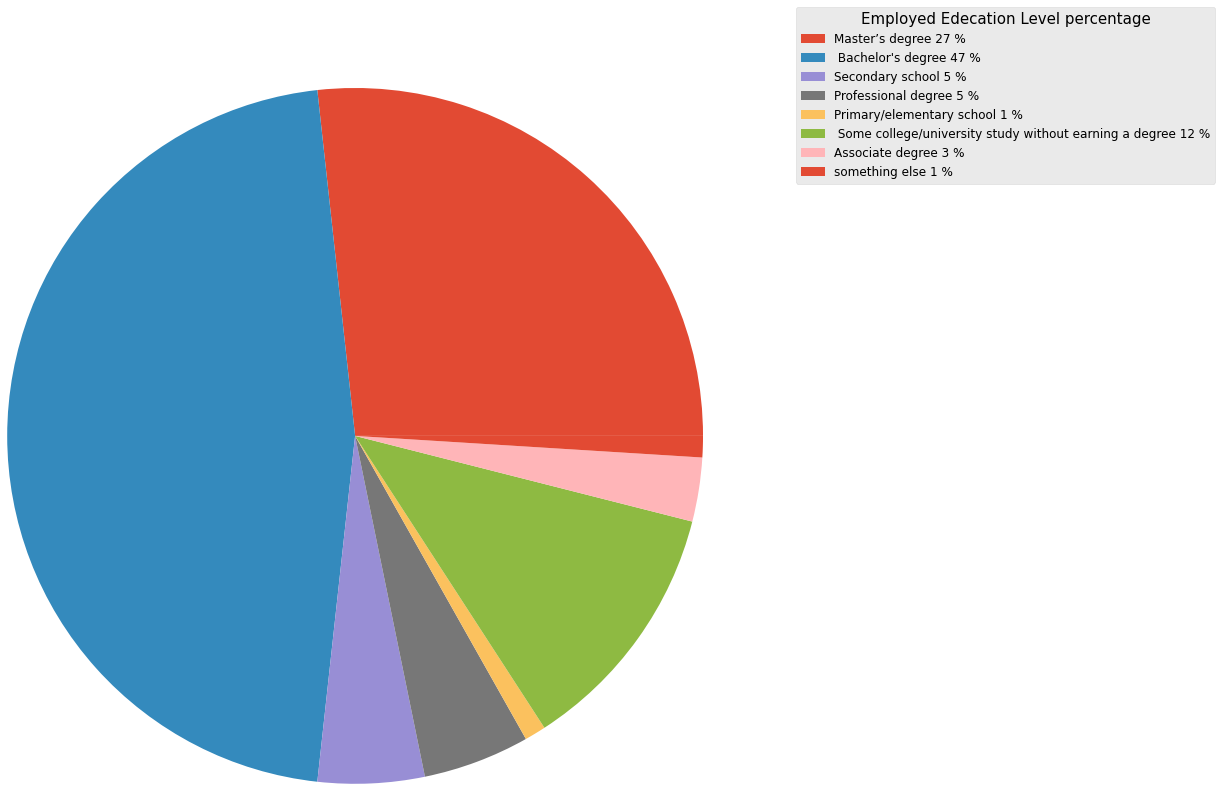

In [258]:
c=0
c1=0
c2=0
c3=0
c4=0
c5=0
c6=0
c7=0
c8=0
for v0,v1,v2 in new_dp.values:
    if v2=='Employed':
        c=c+1
        if v1=='Master’s degree':
            c1=c1+1
        elif v1== 'Bachelor’s degree':
            c2=c2+1
        elif v1 =='Secondary school':
            c3=c3+1
        elif v1=='Professional degree':
            c4=c4+1
        elif v1=='Primary/elementary school':
            c5=c5+1
        elif v1=='Some college/university study without earning a degree':
            c6=c6+1
        elif v1=='Associate degree':
            c7=c7+1
        else: c8=c8+1
#print(f'number of total employees {c}')
#print(f"number of employees with master's degree {c1}")
#print(f"number of employees with Bachelor's degree {c2}")
#print(f"number of employees with Secondary school {c3}")
#print(f"number of employees with Professional degree {c4}")
#print(f"number of employees with Primary/elementary school {c5}")
#print(f"number of employees with Some college/university study without earning a degree {c6}")
#print(f"number of employees with Associate degree {c7}")
#print(f'something else {c8}')

y = np.array([round((c1/c)*100),round((c2/c)*100),round((c3/c)*100),round((c4/c)*100),round((c5/c)*100),round((c6/c)*100),
              round((c7/c)*100),round((c8/c)*100)])
mylabels = [f"Master’s degree {y[0]} %", f" Bachelor's degree {y[1]} %", f"Secondary school {y[2]} %",
            f"Professional degree {y[3]} %",f"Primary/elementary school {y[4]} %",
            f" Some college/university study without earning a degree {y[5]} %",f"Associate degree {y[6]} %",f"something else {y[7]} %"]

plt.pie(y,radius=2)

plt.legend(title = "Employed Edecation Level percentage",title_fontsize=15,labels = mylabels,
           bbox_to_anchor=(1.5,1.5), loc="upper left",fontsize=12)
plt.show() 

In [86]:
dp['RemoteWork'].astype('string')


0                                        <NA>
1                                      Remote
2        Hybrid (some remote, some in-person)
3        Hybrid (some remote, some in-person)
4                                      Remote
                         ...                 
89179                                  Remote
89180    Hybrid (some remote, some in-person)
89181                                    <NA>
89182    Hybrid (some remote, some in-person)
89183    Hybrid (some remote, some in-person)
Name: RemoteWork, Length: 89184, dtype: string

In [262]:
# Type of work Percentage
n_dp=dp[['RemoteWork','Employment']]
n_dp=n_dp.dropna()
n_dp

,RemoteWork,Employment
1,Remote,"Employed, full-time"
2,"Hybrid (some remote, some in-person)","Employed, full-time"
3,"Hybrid (some remote, some in-person)","Employed, full-time"
4,Remote,"Employed, full-time;Independent contractor, fr..."
5,Remote,"Employed, full-time"
...,...,...
89178,Remote,"Employed, full-time"
89179,Remote,"Employed, full-time;Independent contractor, fr..."
89180,"Hybrid (some remote, some in-person)","Student, full-time;Employed, part-time"
89182,"Hybrid (some remote, some in-person)","Employed, part-time;Student, part-time"


In [263]:
# Cleaning the data
list5=[]
for row in n_dp['RemoteWork'].values:
    a5 = row.split('(')[0].strip()
    b5 =list5.append(a5)
n_dp['RemoteWork']=list5

list6=[]
for row in n_dp['Employment'].values:
    a6 = row.split(',')[0].strip()
    b6 =list6.append(a6)
n_dp['Employment']=list6

In [264]:
n_dp

,RemoteWork,Employment
1,Remote,Employed
2,Hybrid,Employed
3,Hybrid,Employed
4,Remote,Employed
5,Remote,Employed
...,...,...
89178,Remote,Employed
89179,Remote,Employed
89180,Hybrid,Student
89182,Hybrid,Employed


In [222]:
pd.value_counts(n_dp['Employment'].values)

Employed                  63258
Independent contractor     9118
Student                    1397
Not employed                 37
dtype: int64

In [265]:
# prepare the data for visualization

def n_array_counter(word1,word2,word3,word4,array):
    count=0
    count2=0
    count3=0
    count4=0
    x=[]
    z=[]
    for v1,v2 in array.values:
        if v2==word1:
            count=count+1
            if v1 == word2:
                count2=count2+1
            if v1 == word3:
                count3=count3+1
            if v1 == word4:
                count4=count4+1
    perc2=round((count2/count)*100)
    perc3=round((count3/count)*100)
    perc4=round((count4/count)*100)
    return [perc2,perc3,perc4],[word2,word3,word4]

In [266]:
x=n_array_counter('Employed','Remote','Hybrid','In-person',n_dp)[0]
z=n_array_counter('Employed','Remote','Hybrid','In-person',n_dp)[1]


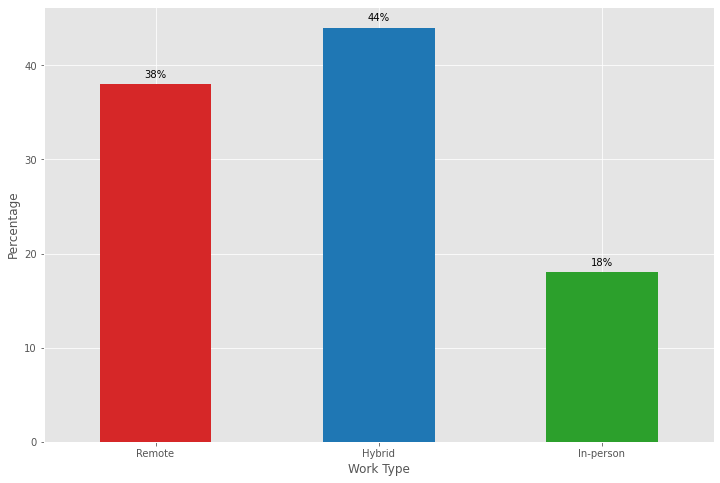

In [267]:
work_type = pd.Series(x)


# Plot the figure.
bar_colors=['tab:red', 'tab:blue', 'tab:green']
lables = ['Remote','Hybrid','In-person']
ax = work_type.plot(kind="bar",color=bar_colors)
ax.set_xlabel("Work Type",fontsize=12)
ax.set_ylabel("Percentage",fontsize=12)
ax.set_xticklabels(lables, rotation=0, rotation_mode="anchor")

rects = ax.patches

# Make some labels.
labels = [f"{x[i]}%" for i in range(len(rects))]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height +0.5 , label, ha="center", va="bottom"
    )

plt.show()

In [268]:
# Work Experience VS Salary
dp1=dp[['WorkExp','ConvertedCompYearly']]
dp1=dp1.dropna()
dp1['Work Experience']=dp1['WorkExp'].astype('int64')
dp1['Salary']=dp1['ConvertedCompYearly'].astype('int64')
dp1

,WorkExp,ConvertedCompYearly,Work Experience,Salary
1,10.0,285000.0,10,285000
2,23.0,250000.0,23,250000
3,7.0,156000.0,7,156000
4,6.0,23456.0,6,23456
5,22.0,96828.0,22,96828
...,...,...,...,...
89162,25.0,50719.0,25,50719
89166,3.0,16917.0,3,16917
89167,2.0,15752.0,2,15752
89170,9.0,64254.0,9,64254


In [269]:
# Cleaning the data

index_max = np.argmax(dp1['Salary'].values) # check for very large data
index_max

21332

In [270]:
# delete the large data not to affect the mean
# 3 data was found biger than 70M dollar per year!!!
dp1.iloc[21332]
dp1=dp1.drop(dp1.index[21332])

In [271]:
index_max = np.argmax(dp1['Salary'].values)
index_max

29637

In [272]:
dp1.iloc[29637]
dp1=dp1.drop(dp1.index[29637])

In [273]:
index_max = np.argmax(dp1['Salary'].values)
index_max

11240

In [274]:
dp1.iloc[11240]
dp1=dp1.drop(dp1.index[11240])

In [243]:
# prepare the data for visualization
n=list(range(0,51))
m=[] 
l=[]
y=0
c=0
for year in n:
    y=0
    c=0
    for w,s in dp1.values:
        if w == year:
            c=c+1
            y=y+s
    l1=l.append(c)
    m1=m.append((year,y))
print(m)
print(l)

[(0, 5631230), (1, 70117678), (2, 93169983), (3, 112138036), (4, 121527659), (5, 188606930), (6, 144303298), (7, 168881600), (8, 166410516), (9, 109374443), (10, 233620134), (11, 110004753), (12, 145067881), (13, 103728094), (14, 75206465), (15, 163020358), (16, 81124807), (17, 85404997), (18, 70932826), (19, 33582620), (20, 133803561), (21, 32135889), (22, 52003078), (23, 68614820), (24, 36879800), (25, 112292737), (26, 35140883), (27, 27505366), (28, 26215278), (29, 15423689), (30, 53664337), (31, 11375921), (32, 15055912), (33, 15172729), (34, 10510447), (35, 34758613), (36, 12227900), (37, 9867201), (38, 7723445), (39, 5360096), (40, 27252435), (41, 4784318), (42, 4607105), (43, 6635639), (44, 2174901), (45, 6957679), (46, 2436532), (47, 1720622), (48, 1039322), (49, 558963), (50, 6686924)]
[143, 1461, 1920, 1972, 1885, 2461, 1820, 1898, 1795, 1153, 2331, 1057, 1391, 947, 686, 1522, 679, 657, 595, 277, 1189, 266, 404, 536, 314, 841, 257, 211, 194, 93, 427, 93, 114, 120, 80, 201, 93

In [244]:
d={}
for k,v in m:
    mean=v/l[k]
    d[k]=round(mean)

lists = sorted(d.items()) # sorted by key, return a list of tuples

dx, dy = zip(*lists) # unpack a list of pairs into two tuples

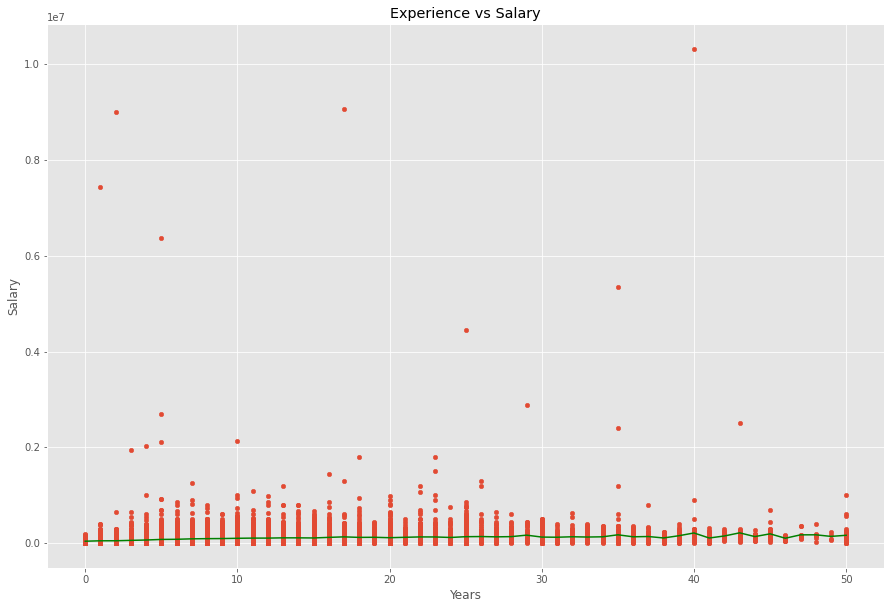

In [276]:
plt.figure(figsize=(15, 10))
plt.scatter(x=dp1['Work Experience'],y=dp1['Salary'],s=20)
plt.title('Experience vs Salary')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.plot(dx, dy,color="Green") # connecting the mean values
plt.show()

<AxesSubplot:xlabel='Work Experience', ylabel='Salary'>

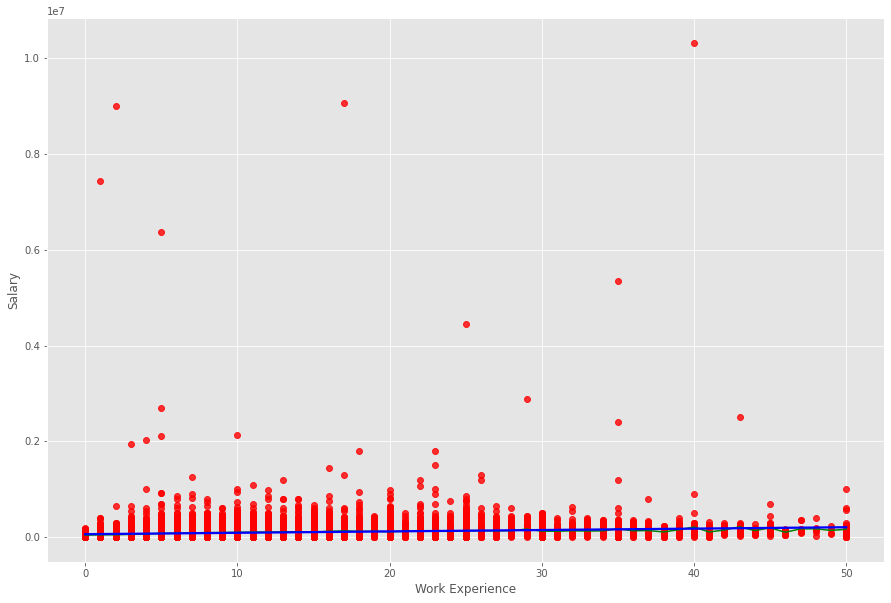

In [277]:
plt.figure(figsize=(15, 10))
plt.plot(dx, dy,color="Green")
sns.regplot(x='Work Experience',y='Salary',data=dp1,scatter_kws={'color':'red'},line_kws={'color':'blue'})